In [50]:
# notebooks/example_notebook.ipynb
import sys
import os
sys.path.append(os.path.abspath('../scripts'))

In [51]:
from ab_testing import save_insurance_data_to_csv

In [52]:
# Example usage
text_file_path =  "D:\\Data Science\\Kifya\\KAIM_WEEK3\\week3_task1\\AB Hypothesis Testing\\data\\MachineLearningRating_v3.txt"  
save_insurance_data_to_csv(text_file_path)

d:\Data Science\Kifya\KAIM_WEEK3\week3_task1\AB Hypothesis Testing\scripts\ab_testing.py:65: DtypeWarning: Columns (32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(text_file_path, delimiter='|')


Data saved to d:\Data Science\Kifya\KAIM_WEEK3\week3_task1\AB Hypothesis Testing\data\insurance_text_data.csv


In [53]:
import pandas as pd
from scipy import stats


In [54]:
# Load the data
csv_file_path = '../data/insurance_text_data.csv'  # Replace with actual CSV file path
df = pd.read_csv(csv_file_path)

# Display the first few rows of the DataFrame
df.head()


C:\Users\eep\AppData\Local\Temp\ipykernel_10536\2911392983.py:3: DtypeWarning: Columns (32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_file_path)


,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
0,145249,12827,2015-03-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
1,145249,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
2,145249,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
3,145255,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,512.848070,0.0
4,145255,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0


In [55]:
# Define your groups (A and B)
group_a = df[df['Gender'] == 'Male']['TotalClaims']
group_b = df[df['Gender'] == 'Female']['TotalClaims']


In [56]:
# Perform an independent t-test
t_stat, p_value = stats.ttest_ind(group_a, group_b, nan_policy='omit')

# Print the results
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")


T-statistic: -0.24803623812388725
P-value: 0.8041073961270343


In [57]:
# Interpret the results
alpha = 0.05  # significance level
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between the groups.")
else:
    print("Fail to reject the null hypothesis: No significant difference between the groups.")


Fail to reject the null hypothesis: No significant difference between the groups.


############Identify Missing Values

In [58]:
missing_values = df.isnull().sum()
print(missing_values)

UnderwrittenCoverID               0
PolicyID                          0
TransactionMonth                  0
IsVATRegistered                   0
Citizenship                       0
LegalType                         0
Title                             0
Language                          0
Bank                         145961
AccountType                   40232
MaritalStatus                  8259
Gender                         9536
Country                           0
Province                          0
PostalCode                        0
MainCrestaZone                    0
SubCrestaZone                     0
ItemType                          0
mmcode                          552
VehicleType                     552
RegistrationYear                  0
make                            552
Model                           552
Cylinders                       552
cubiccapacity                   552
kilowatts                       552
bodytype                        552
NumberOfDoors               

In [59]:
print(df.dtypes)

UnderwrittenCoverID           int64
PolicyID                      int64
TransactionMonth             object
IsVATRegistered                bool
Citizenship                  object
LegalType                    object
Title                        object
Language                     object
Bank                         object
AccountType                  object
MaritalStatus                object
Gender                       object
Country                      object
Province                     object
PostalCode                    int64
MainCrestaZone               object
SubCrestaZone                object
ItemType                     object
mmcode                      float64
VehicleType                  object
RegistrationYear              int64
make                         object
Model                        object
Cylinders                   float64
cubiccapacity               float64
kilowatts                   float64
bodytype                     object
NumberOfDoors               

In [60]:
df = df.drop(columns=['CustomValueEstimate', 'WrittenOff', 'Rebuilt', 'Converted', 'CrossBorder', 'NumberOfVehiclesInFleet'])

In [61]:
# Convert columns to numeric, coercing errors
df['CapitalOutstanding'] = pd.to_numeric(df['CapitalOutstanding'], errors='coerce')

df['NumberOfDoors'] = pd.to_numeric(df['NumberOfDoors'], errors='coerce')
df['NewVehicle'] = pd.to_numeric(df['NewVehicle'], errors='coerce')
df['VehicleIntroDate'] = pd.to_numeric(df['VehicleIntroDate'], errors='coerce')



In [62]:
# Impute missing values for other columns

# Impute categorical columns with the mode
df['Bank'] = df['Bank'].fillna(df['Bank'].mode()[0])
df['AccountType'] = df['AccountType'].fillna(df['AccountType'].mode()[0])
df['MaritalStatus'] = df['MaritalStatus'].fillna(df['MaritalStatus'].mode()[0])
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['VehicleType'] = df['VehicleType'].fillna(df['VehicleType'].mode()[0])
df['make'] = df['make'].fillna(df['make'].mode()[0])
df['Model'] = df['Model'].fillna(df['Model'].mode()[0])
df['Cylinders'] = df['Cylinders'].fillna(df['Cylinders'].mode()[0])
df['bodytype'] = df['bodytype'].fillna(df['bodytype'].mode()[0]) 

# Impute numerical columns with the mean
df['mmcode'] = df['mmcode'].fillna(df['mmcode'].mean())
df['cubiccapacity'] = df['cubiccapacity'].fillna(df['cubiccapacity'].mean())
df['kilowatts'] = df['kilowatts'].fillna(df['kilowatts'].mean())

df['NumberOfDoors'] = df['NumberOfDoors'].fillna(df['NumberOfDoors'].mean())
df['CapitalOutstanding'] = df['CapitalOutstanding'].fillna(df['CapitalOutstanding'].mean())
df['VehicleIntroDate'] = df['VehicleIntroDate'].fillna(df['VehicleIntroDate'].mean())
df['NewVehicle'] = df['NewVehicle'].fillna(df['NewVehicle'].mean())



# Print the number of missing values after imputation
print(df.isnull().sum())


UnderwrittenCoverID               0
PolicyID                          0
TransactionMonth                  0
IsVATRegistered                   0
Citizenship                       0
LegalType                         0
Title                             0
Language                          0
Bank                              0
AccountType                       0
MaritalStatus                     0
Gender                            0
Country                           0
Province                          0
PostalCode                        0
MainCrestaZone                    0
SubCrestaZone                     0
ItemType                          0
mmcode                            0
VehicleType                       0
RegistrationYear                  0
make                              0
Model                             0
Cylinders                         0
cubiccapacity                     0
kilowatts                         0
bodytype                          0
NumberOfDoors               

In [63]:
missing_values = df.isnull().sum()
print(missing_values)

UnderwrittenCoverID               0
PolicyID                          0
TransactionMonth                  0
IsVATRegistered                   0
Citizenship                       0
LegalType                         0
Title                             0
Language                          0
Bank                              0
AccountType                       0
MaritalStatus                     0
Gender                            0
Country                           0
Province                          0
PostalCode                        0
MainCrestaZone                    0
SubCrestaZone                     0
ItemType                          0
mmcode                            0
VehicleType                       0
RegistrationYear                  0
make                              0
Model                             0
Cylinders                         0
cubiccapacity                     0
kilowatts                         0
bodytype                          0
NumberOfDoors               

##########Impute Missing Values

In [64]:
# Data Summarization
# # Calculate summary statistics
numerical_stats = df.describe()
print("Numerical statistics:\n", numerical_stats)

# Group by 'TransactionMonth' and calculate summary statistics
monthly_stats = df.groupby('TransactionMonth').describe()
print("Monthly statistics:\n", monthly_stats)

Numerical statistics:
        UnderwrittenCoverID      PolicyID    PostalCode        mmcode  \
count         1.000098e+06  1.000098e+06  1.000098e+06  1.000098e+06   
mean          1.048175e+05  7.956682e+03  3.020601e+03  5.487770e+07   
std           6.329371e+04  5.290039e+03  2.649854e+03  1.360005e+07   
min           1.000000e+00  1.400000e+01  1.000000e+00  4.041200e+06   
25%           5.514300e+04  4.500000e+03  8.270000e+02  6.005692e+07   
50%           9.408300e+04  7.071000e+03  2.000000e+03  6.005842e+07   
75%           1.391900e+05  1.107700e+04  4.180000e+03  6.005842e+07   
max           3.011750e+05  2.324600e+04  9.870000e+03  6.506535e+07   

       RegistrationYear     Cylinders  cubiccapacity     kilowatts  \
count      1.000098e+06  1.000098e+06   1.000098e+06  1.000098e+06   
mean       2.010225e+03  4.046616e+00   2.466743e+03  9.720792e+01   
std        3.261391e+00  2.939410e-01   4.426784e+02  1.938790e+01   
min        1.987000e+03  0.000000e+00   0.000000

UnderwrittenCoverID               0
PolicyID                          0
TransactionMonth                  0
IsVATRegistered                   0
Citizenship                       0
LegalType                         0
Title                             0
Language                          0
Bank                              0
AccountType                       0
MaritalStatus                     0
Gender                            0
Country                           0
Province                          0
PostalCode                        0
MainCrestaZone                    0
SubCrestaZone                     0
ItemType                          0
mmcode                            0
VehicleType                       0
RegistrationYear                  0
make                              0
Model                             0
Cylinders                         0
cubiccapacity                     0
kilowatts                         0
bodytype                          0
NumberOfDoors               

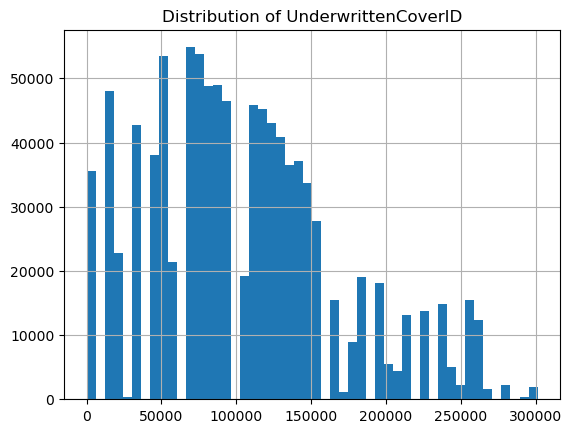

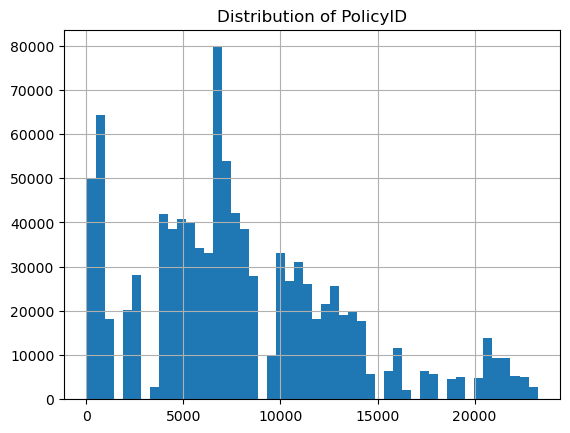

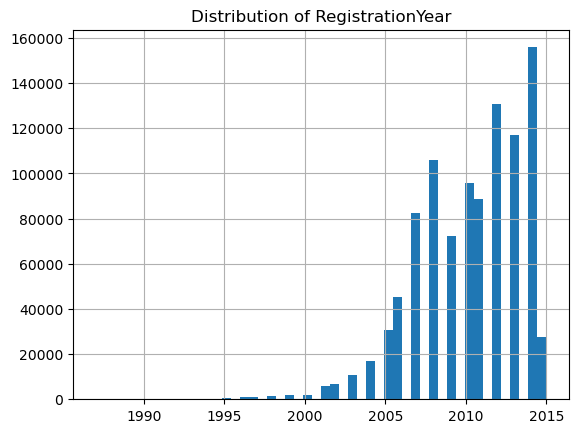

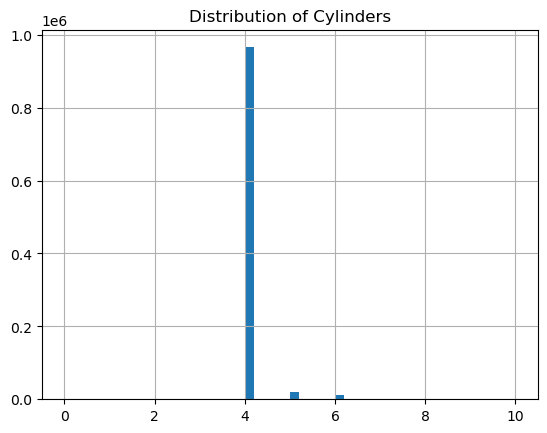

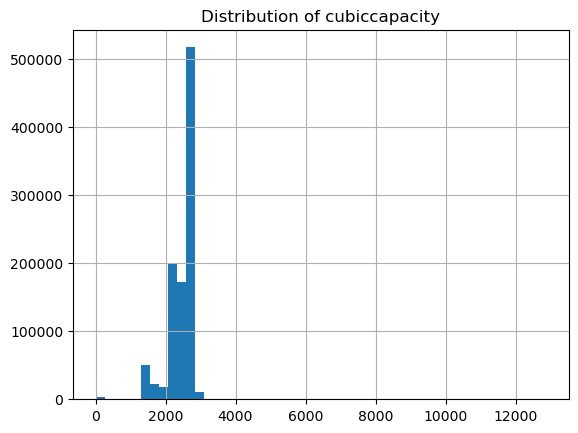

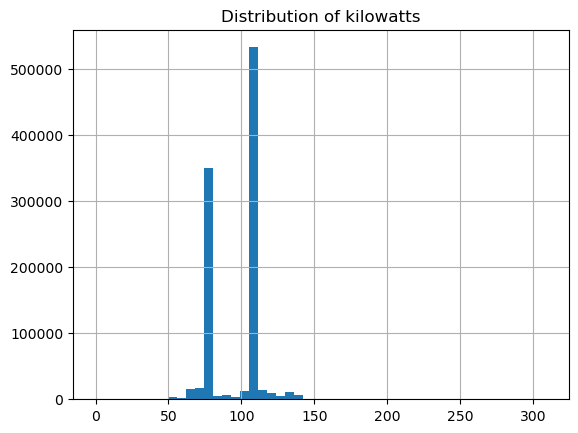

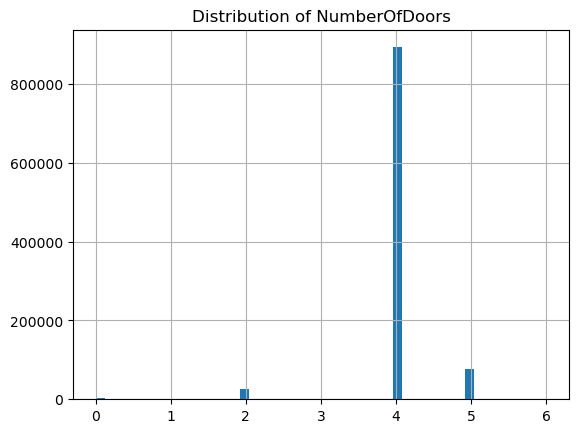

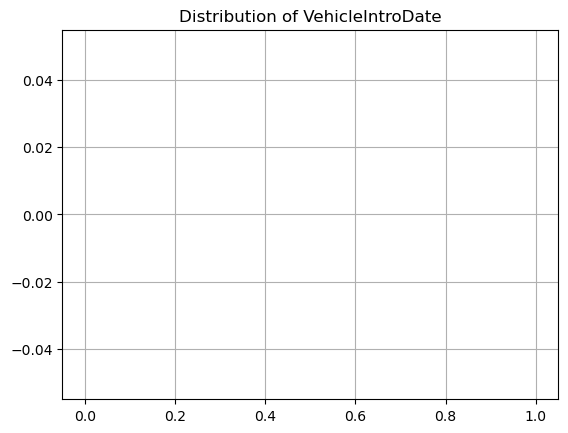

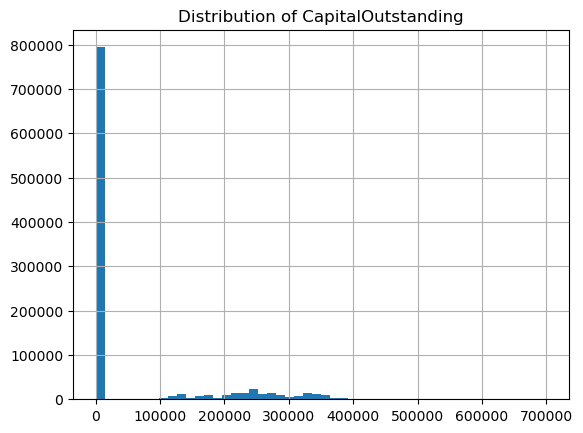

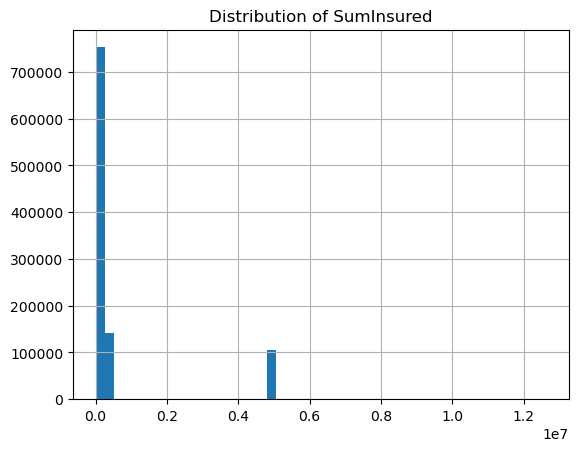

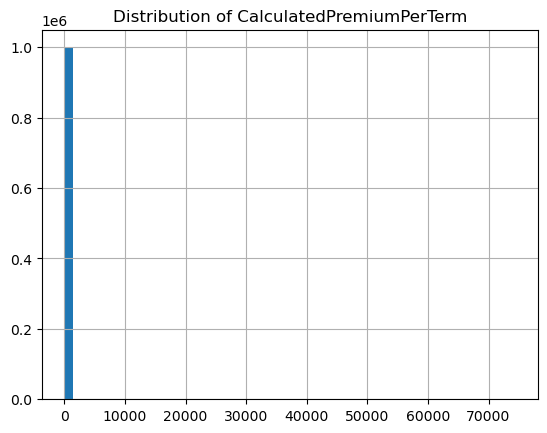

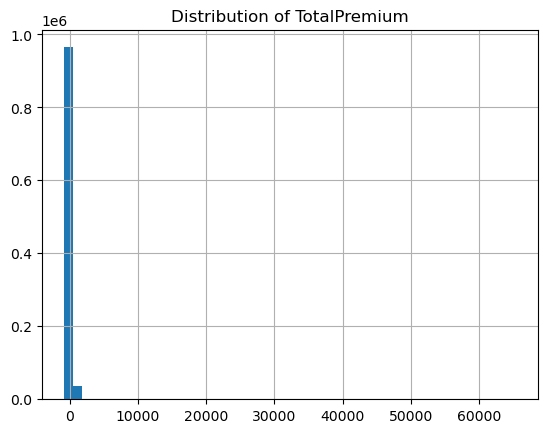

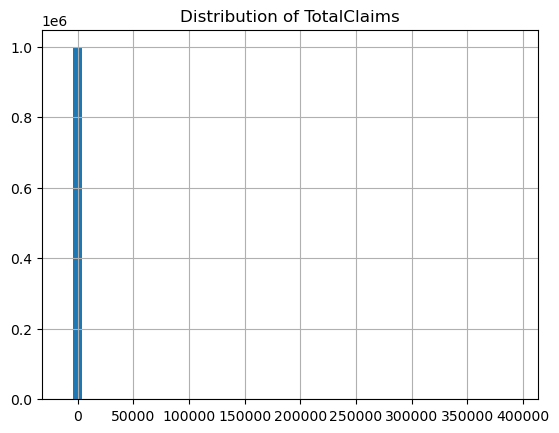

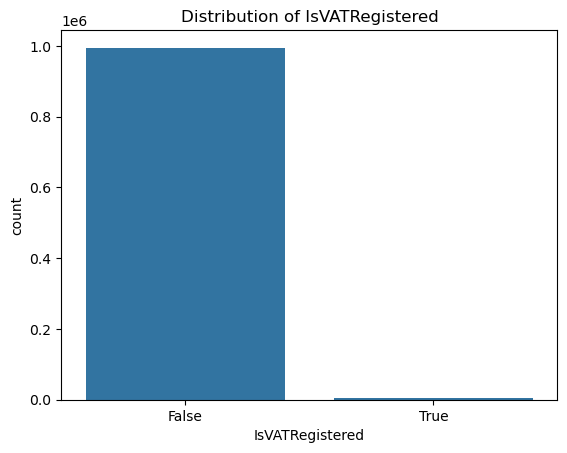

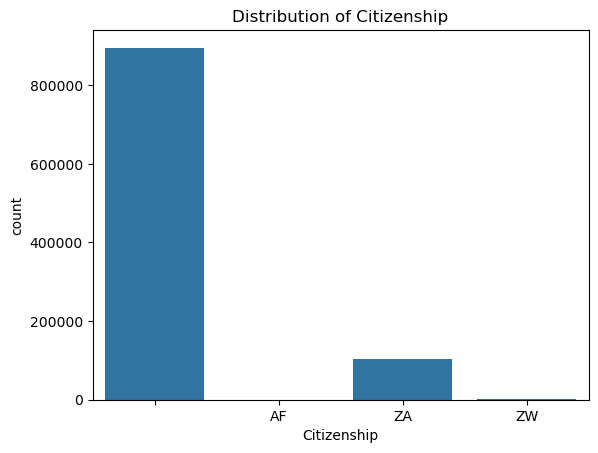

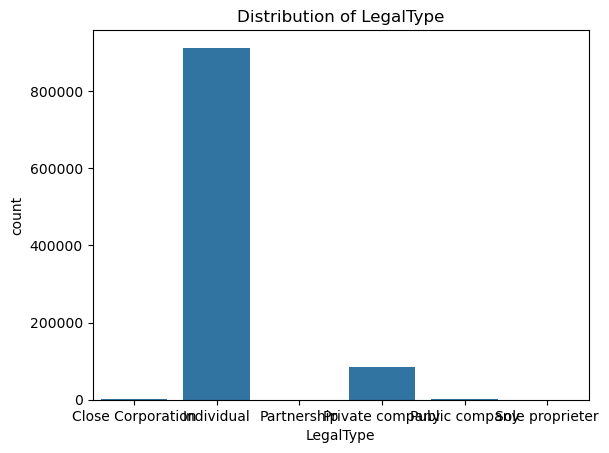

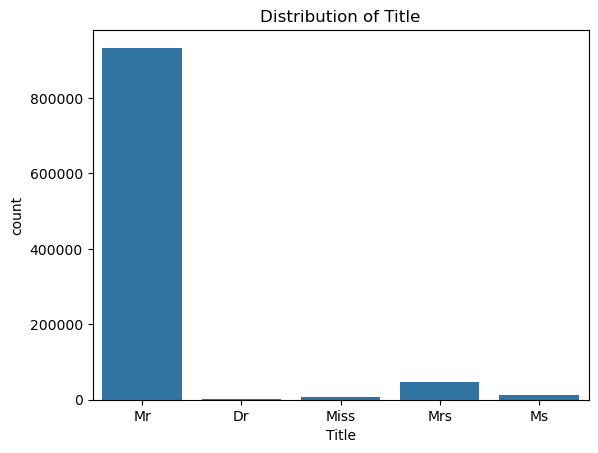

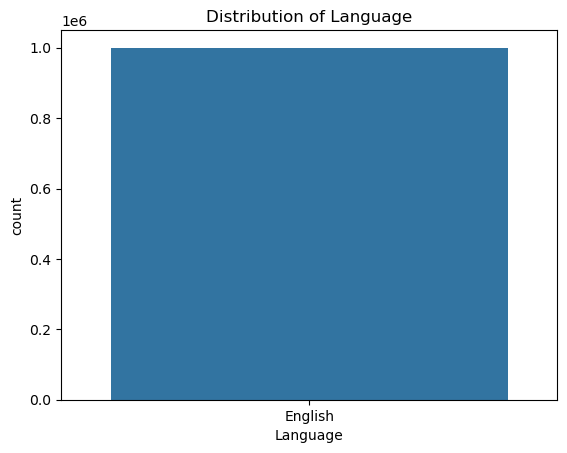

Skipping 'Bank' with 11 unique values for bar chart


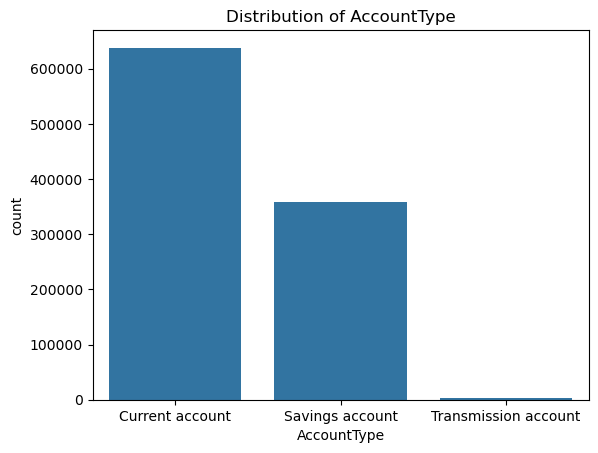

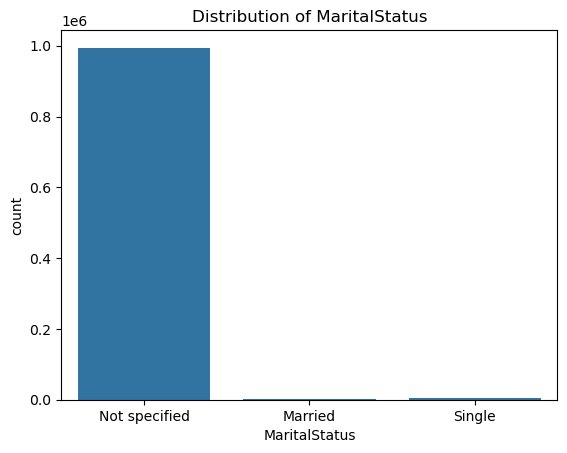

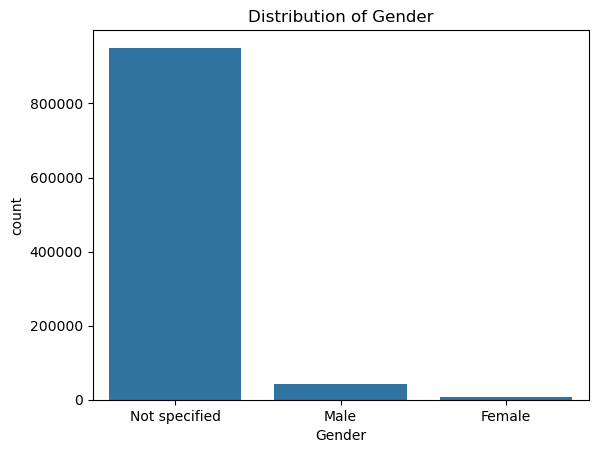

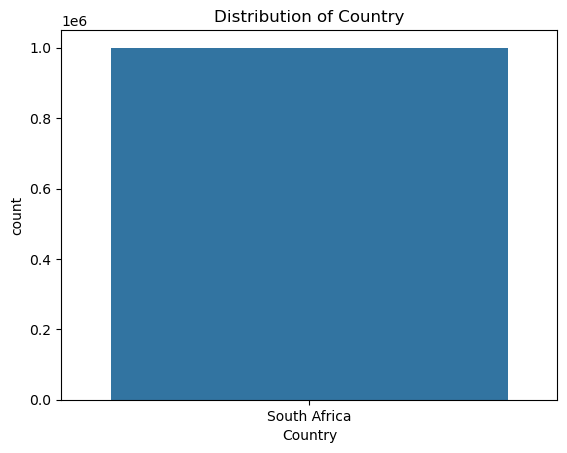

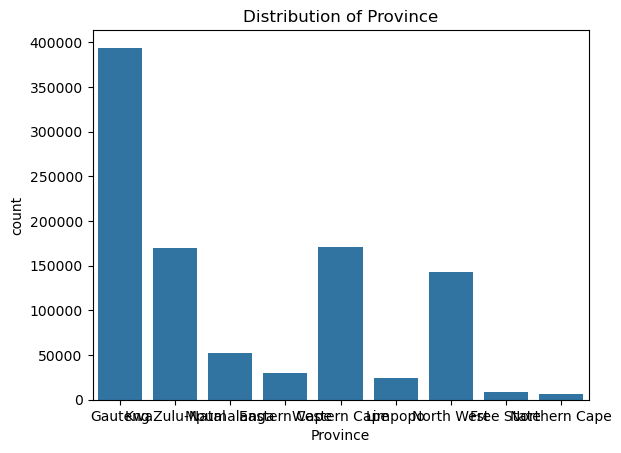

Skipping 'PostalCode' with 888 unique values for bar chart
Skipping 'MainCrestaZone' with 16 unique values for bar chart
Skipping 'SubCrestaZone' with 45 unique values for bar chart


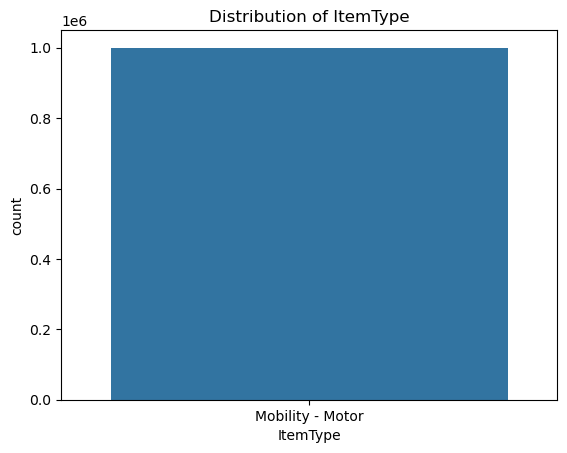

Skipping 'mmcode' with 428 unique values for bar chart


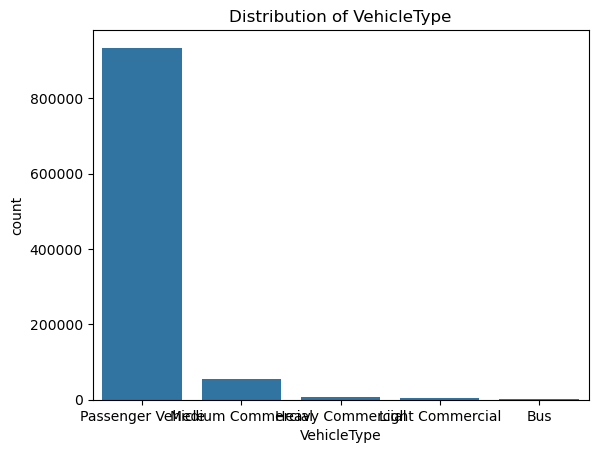

Skipping 'bodytype' with 13 unique values for bar chart


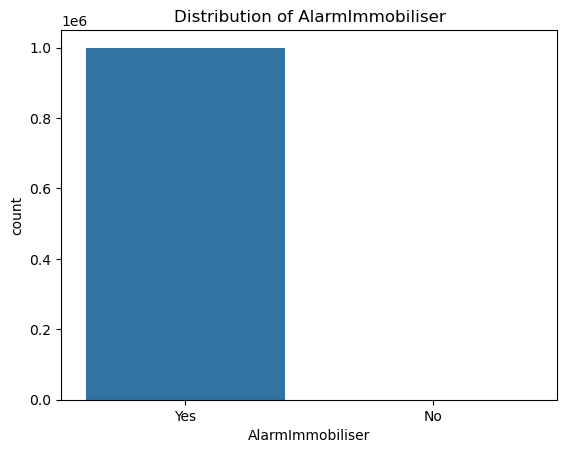

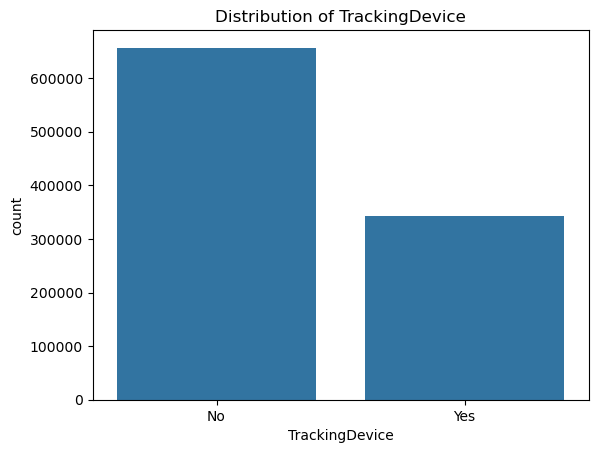

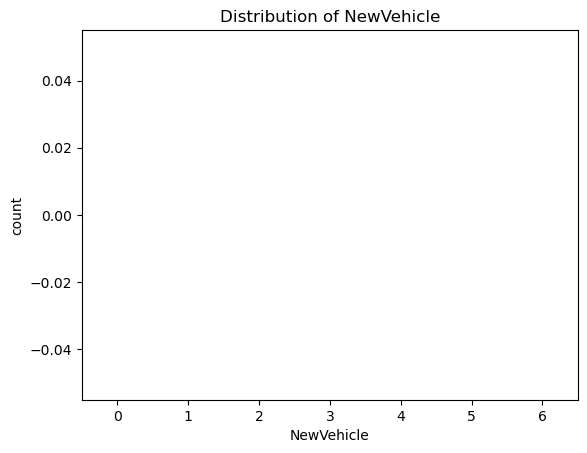

Skipping 'CoverCategory' with 28 unique values for bar chart
Skipping 'CoverType' with 22 unique values for bar chart
Skipping 'CoverGroup' with 14 unique values for bar chart


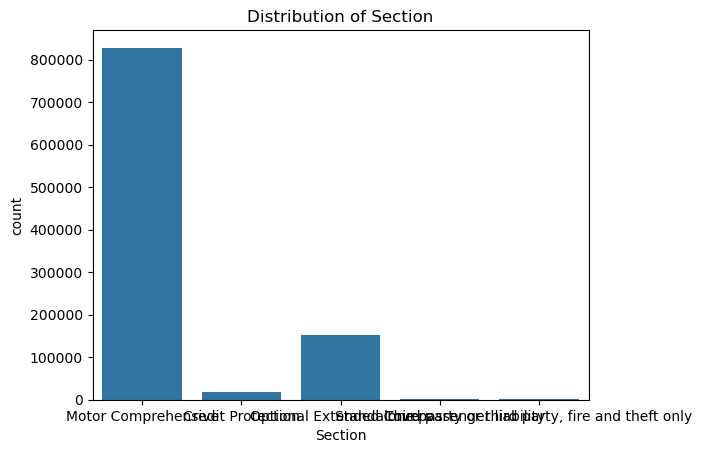

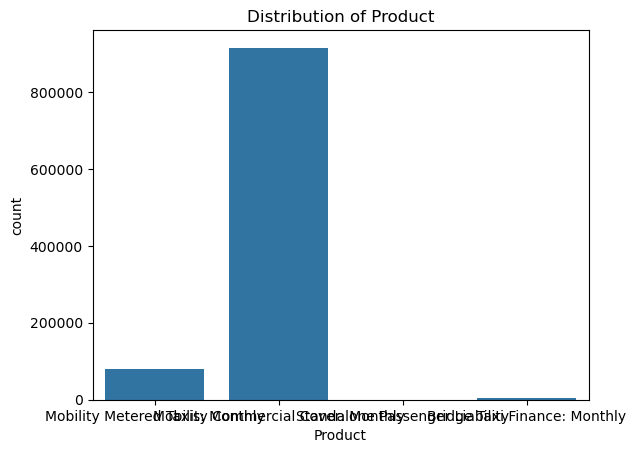

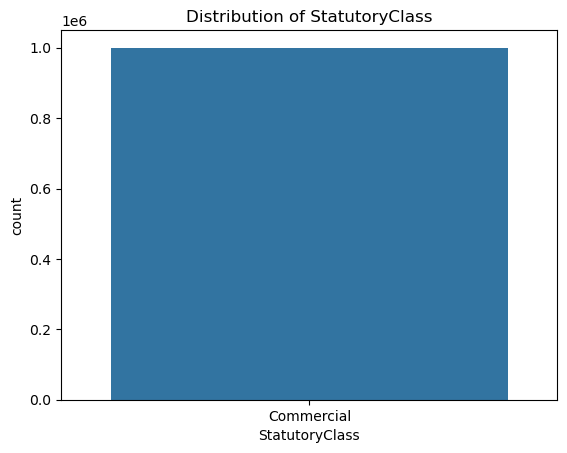

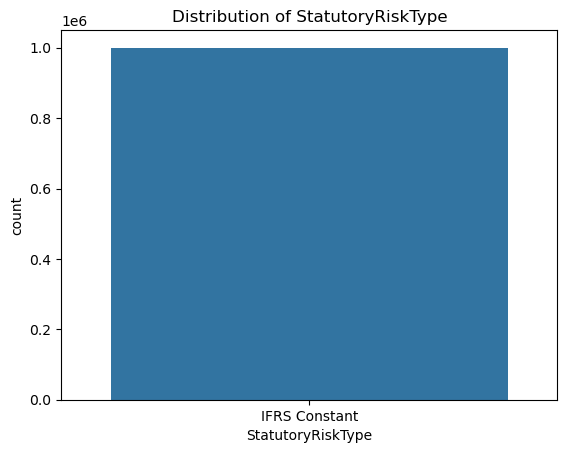

In [67]:
#Univariate Analysis
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd  # Assuming your data is loaded into a pandas DataFrame named 'data'

# Check for missing values (optional but recommended)
print(df.isnull().sum())  # This will show the number of missing values in each column

# Categorical vs Numerical Columns (consider data types)
categorical_cols = [
    'IsVATRegistered', 'Citizenship', 'LegalType', 'Title', 'Language', 'Bank',
    'AccountType', 'MaritalStatus', 'Gender', 'Country', 'Province', 'PostalCode',
    'MainCrestaZone', 'SubCrestaZone', 'ItemType', 'mmcode', 'VehicleType',
    'bodytype', 'AlarmImmobiliser', 'TrackingDevice', 'NewVehicle', 'CoverCategory',
    'CoverType', 'CoverGroup', 'Section', 'Product', 'StatutoryClass', 'StatutoryRiskType'
]

numerical_cols = [col for col in df.columns if col not in categorical_cols]  # Assuming remaining are numerical

# Generate histograms for numerical variables
for col in numerical_cols:
    if not pd.api.types.is_numeric_dtype(df[col]):  # Check for actual numeric data type
        continue  # Skip columns that aren't truly numeric
    df[col].hist(bins=50)
    plt.title(f'Distribution of {col}')
    plt.show()

# Generate bar charts for categorical variables (excluding columns with many unique values)
for col in categorical_cols:
    n_unique_values = df[col].nunique()
    if n_unique_values > 10:  # Adjust threshold as needed (e.g., 20) to avoid overwhelming plots
        print(f"Skipping '{col}' with {n_unique_values} unique values for bar chart")
        continue
    sns.countplot(x=col, data=df)
    plt.title(f'Distribution of {col}')
    plt.show()


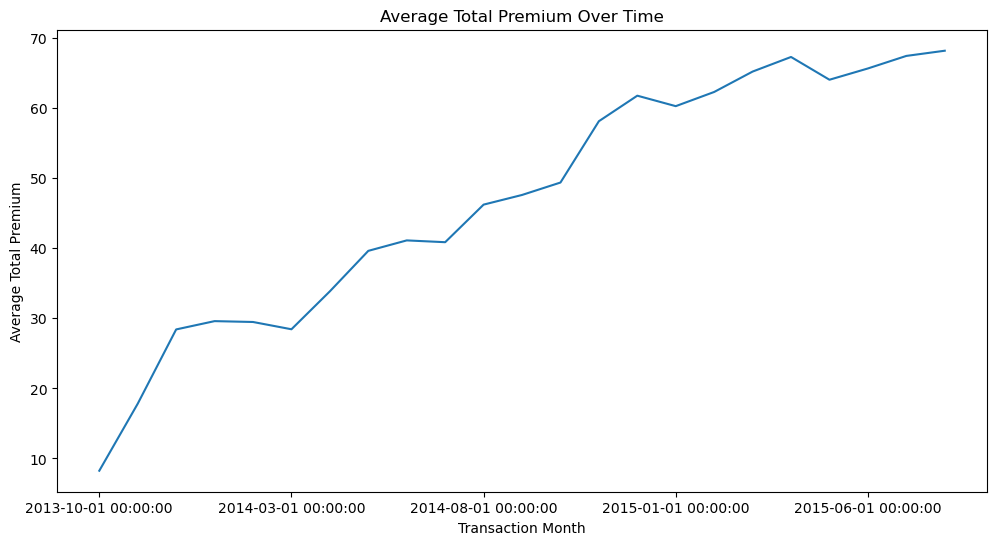

In [68]:
#Data Visualization
import matplotlib.pyplot as plt

# Plot average 'TotalPremium' over time
plt.figure(figsize=(12, 6))
df.groupby('TransactionMonth')['TotalPremium'].mean().plot()
plt.title('Average Total Premium Over Time')
plt.xlabel('Transaction Month')
plt.ylabel('Average Total Premium')
plt.show()

UnderwrittenCoverID               0
PolicyID                          0
TransactionMonth                  0
IsVATRegistered                   0
Citizenship                       0
LegalType                         0
Title                             0
Language                          0
Bank                              0
AccountType                       0
MaritalStatus                     0
Gender                            0
Country                           0
Province                          0
PostalCode                        0
MainCrestaZone                    0
SubCrestaZone                     0
ItemType                          0
mmcode                            0
VehicleType                       0
RegistrationYear                  0
make                              0
Model                             0
Cylinders                         0
cubiccapacity                     0
kilowatts                         0
bodytype                          0
NumberOfDoors               

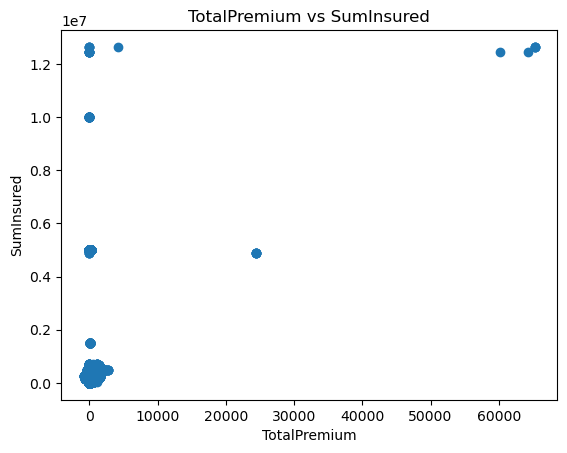

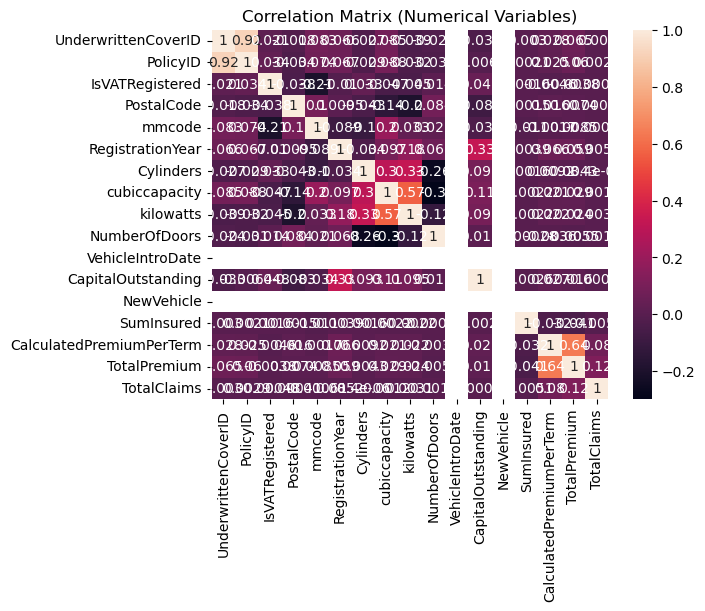

In [71]:
#Bivariate & Multivariate Analysis
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd  # Assuming your data is loaded into a pandas DataFrame named 'data'

# Check for missing values (recommended)
print(df.isnull().sum())  # This will show the number of missing values in each column

# Numerical Columns (consider data types)
numerical_cols = [col for col in df.columns if pd.api.types.is_numeric_dtype(df[col])]

# Bivariate Analysis: Scatter Plots
# Choose pairs of numerical variables for exploration (consider domain knowledge)
scatter_var1 = 'TotalPremium'
scatter_var2 = 'SumInsured'  # Replace based on your interest

plt.scatter(df[scatter_var1], df[scatter_var2])
plt.title(f'{scatter_var1} vs {scatter_var2}')
plt.xlabel(scatter_var1)
plt.ylabel(scatter_var2)
plt.show()

# Multivariate Analysis: Correlation Matrix
correlation_matrix = df[numerical_cols].corr()  # Consider selecting relevant numerical columns

sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix (Numerical Variables)')
plt.show()

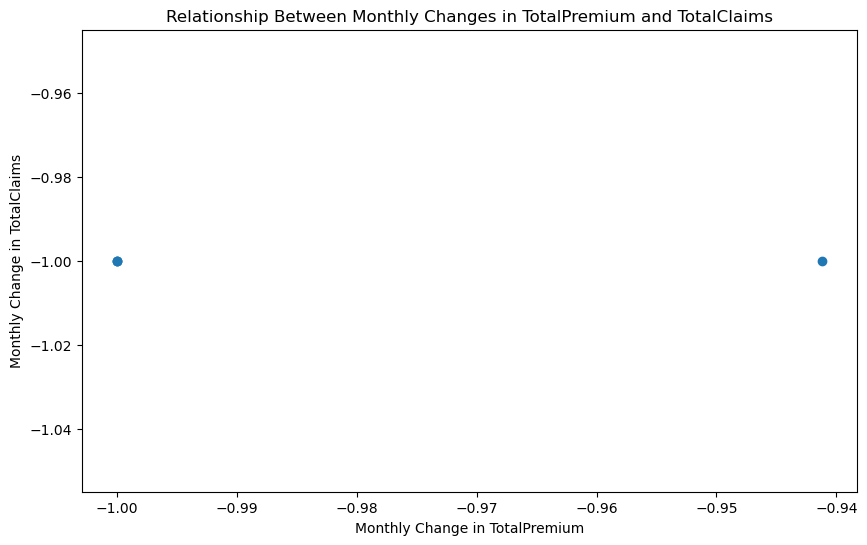

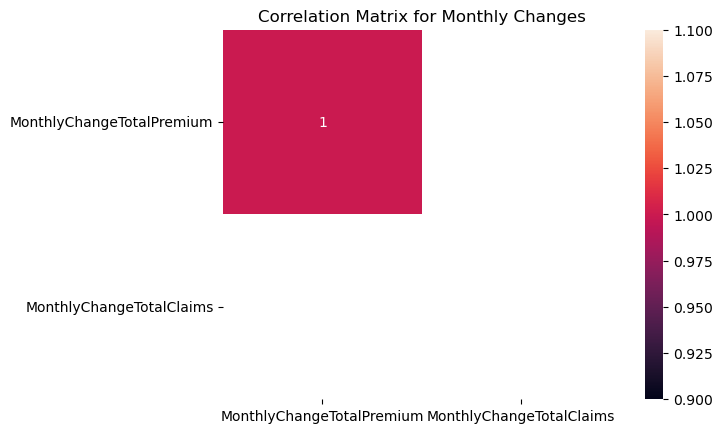

In [74]:
#■	Correlations and Associations: Explore relationships between the monthly changes TotalPremium and TotalClaims as a function of ZipCode, using scatter plots and correlation matrices.
# Calculate monthly changes (assuming 'TransactionMonth' is a datetime column)
df['MonthlyChangeTotalPremium'] = df['TotalPremium'].pct_change()
df['MonthlyChangeTotalClaims'] = df['TotalClaims'].pct_change()

# Group by 'ZipCode' and calculate average monthly changes
grouped_data = df.groupby('PostalCode')[['MonthlyChangeTotalPremium', 'MonthlyChangeTotalClaims']].mean()

# Scatter plot to visualize the relationship between monthly changes of TotalPremium and TotalClaims
plt.figure(figsize=(10, 6))
plt.scatter(grouped_data['MonthlyChangeTotalPremium'], grouped_data['MonthlyChangeTotalClaims'])
plt.title('Relationship Between Monthly Changes in TotalPremium and TotalClaims')
plt.xlabel('Monthly Change in TotalPremium')
plt.ylabel('Monthly Change in TotalClaims')
plt.show()

# Correlation matrix to quantify the relationship
correlation_matrix = grouped_data.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix for Monthly Changes')
plt.show()

In [81]:
import re

# Clean leading spaces and time component
def clean_date_string(date_str):
  return re.sub(r"^\s*(\d{4}-\d{2}).*", r"\1", date_str)  # Replace with your actual pattern if needed

df['TransactionMonth'] = df['TransactionMonth'].apply(clean_date_string)

# Convert to datetime format
df['TransactionMonth'] = pd.to_datetime(df['TransactionMonth'], format='%Y-%m')

In [90]:
# Check for columns with non-numeric values
non_numeric_cols = df.select_dtypes(include=['object']).columns

# Display unique values in these columns to identify problematic entries
for col in non_numeric_cols:
    print(f"Unique values in {col}:")
    print(df[col].unique())


Unique values in Citizenship:
['  ' 'AF' 'ZA' 'ZW']
Unique values in LegalType:
['Close Corporation' 'Individual' 'Partnership' 'Private company'
 'Public company' 'Sole proprieter']
Unique values in Title:
['Mr' 'Dr' 'Miss' 'Mrs' 'Ms']
Unique values in Language:
['English']
Unique values in Bank:
['First National Bank' 'Standard Bank' 'ABSA Bank' 'Capitec Bank'
 'Nedbank' 'FirstRand Bank' 'Investec Bank' 'Ithala Bank' 'Old Mutual'
 'Mercantile Lisbon Bank' 'RMB Private Bank']
Unique values in AccountType:
['Current account' 'Savings account' 'Transmission account']
Unique values in MaritalStatus:
['Not specified' 'Married' 'Single']
Unique values in Gender:
['Not specified' 'Male' 'Female']
Unique values in Country:
['South Africa']
Unique values in Province:
['Gauteng' 'KwaZulu-Natal' 'Mpumalanga' 'Eastern Cape' 'Western Cape'
 'Limpopo' 'North West' 'Free State' 'Northern Cape']
Unique values in MainCrestaZone:
['Rand East' 'Transvaal (all except Pretoria)' 'Johannesburg'
 'Natal (D

In [92]:
# Convert problematic columns to numeric, forcing errors to NaN
for col in non_numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Handle NaN values, e.g., by filling with mean
df = df.fillna(df.mean())


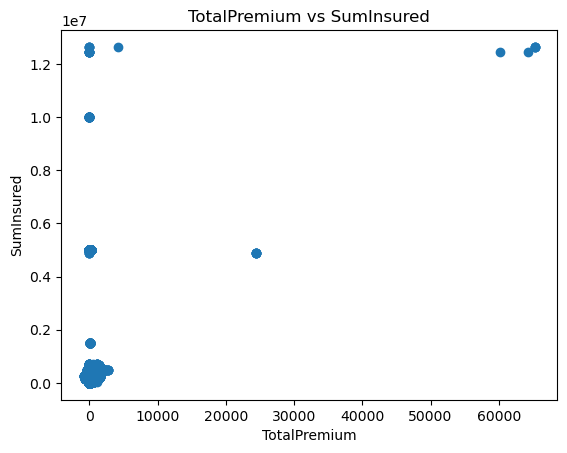

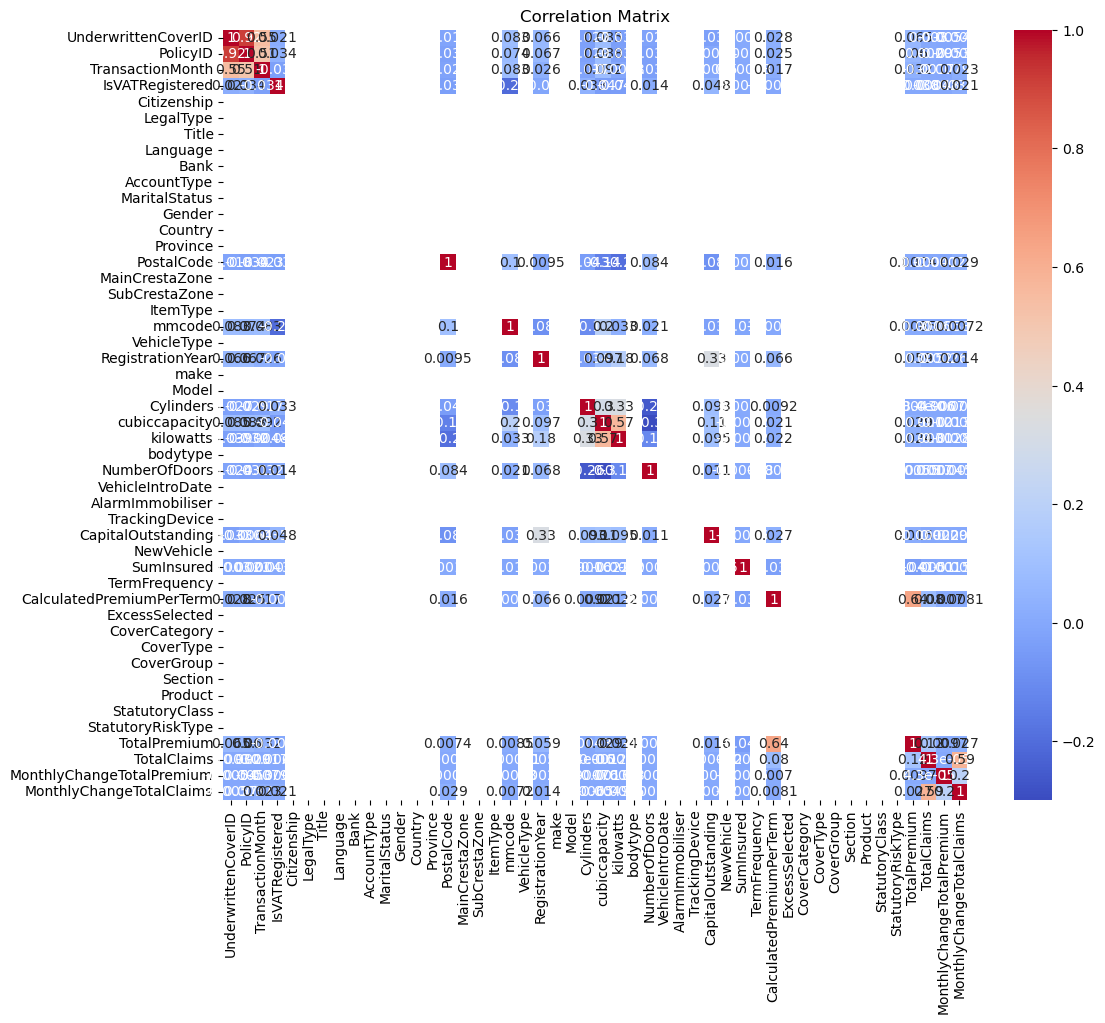

In [95]:
# Bivariate Analysis: Scatter Plots and Correlation Matrix

# Scatter plot
plt.scatter(df['TotalPremium'], df['SumInsured'])
plt.title('TotalPremium vs SumInsured')
plt.xlabel('TotalPremium')
plt.ylabel('SumInsured')
plt.show()

# Correlation matrix
correlation_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


Empty DataFrame
Columns: [Province, TotalPremium, TotalClaims, make, CoverType]
Index: []


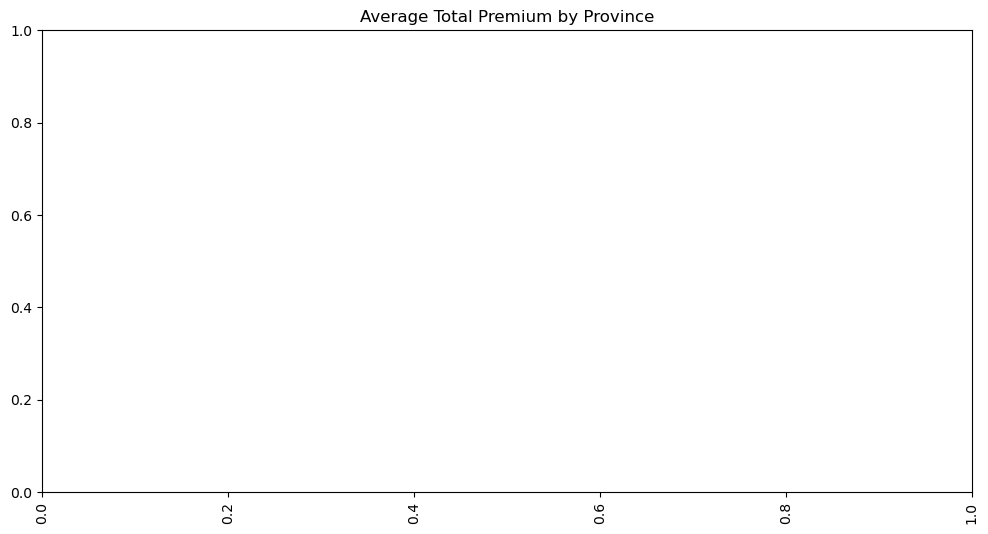

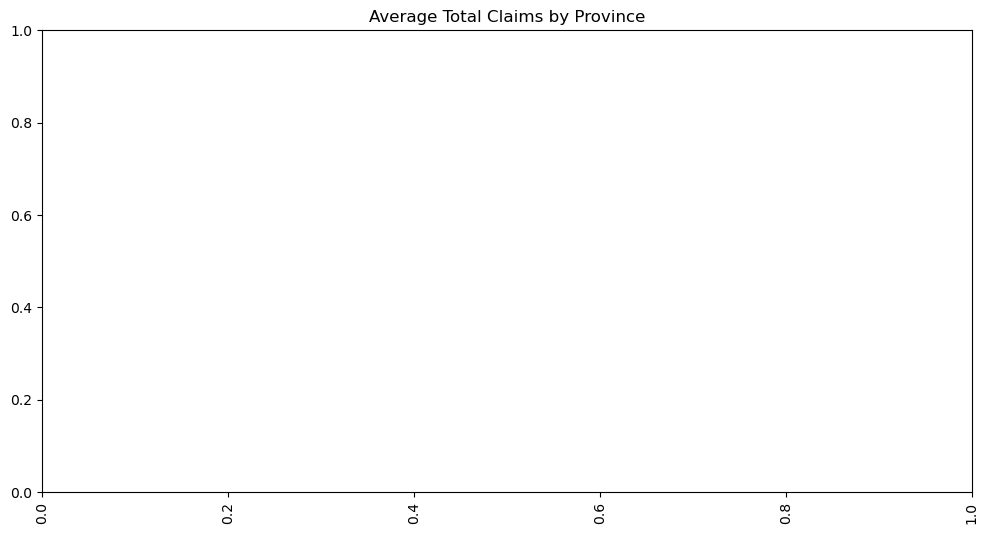

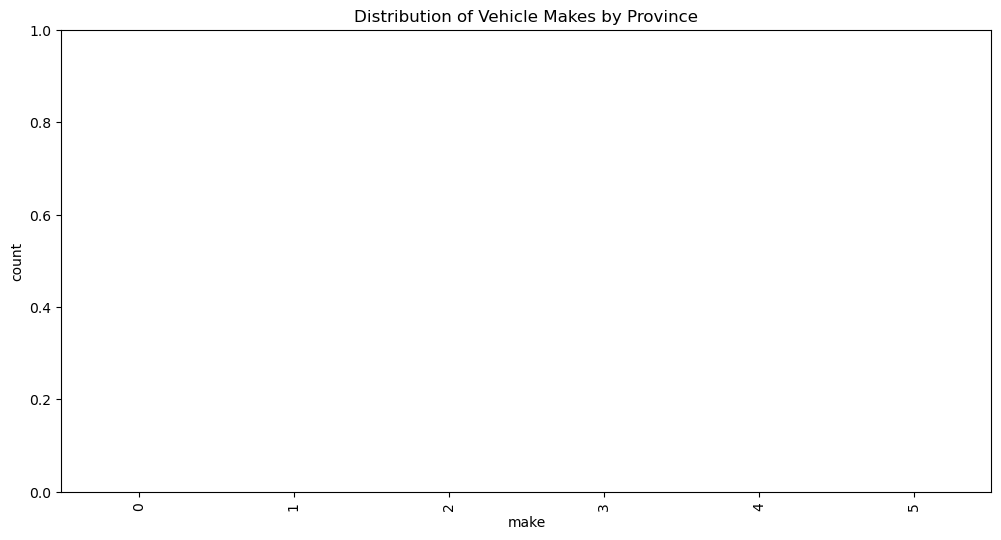

In [96]:
# Group by 'Province' and calculate summary statistics
province_summary = df.groupby('Province').agg({
    'TotalPremium': 'mean',
    'TotalClaims': 'mean',
    'make': lambda x: x.value_counts().index[0],  # Most frequent vehicle make
    'CoverType': lambda x: x.value_counts().index[0]  # Most frequent cover type
}).reset_index()

# Print the summary to review
print(province_summary)

# Plot trends over geography

# Total Premiums by Province
plt.figure(figsize=(12, 6))
sns.barplot(x='Province', y='TotalPremium', data=province_summary)
plt.xticks(rotation=90)
plt.title('Average Total Premium by Province')
plt.show()

# Total Claims by Province
plt.figure(figsize=(12, 6))
sns.barplot(x='Province', y='TotalClaims', data=province_summary)
plt.xticks(rotation=90)
plt.title('Average Total Claims by Province')
plt.show()

# Most Frequent Vehicle Make by Province
plt.figure(figsize=(12, 6))
sns.countplot(x='make', data=df, hue='Province')
plt.xticks(rotation=90)
plt.title('Distribution of Vehicle Makes by Province')
plt.show()

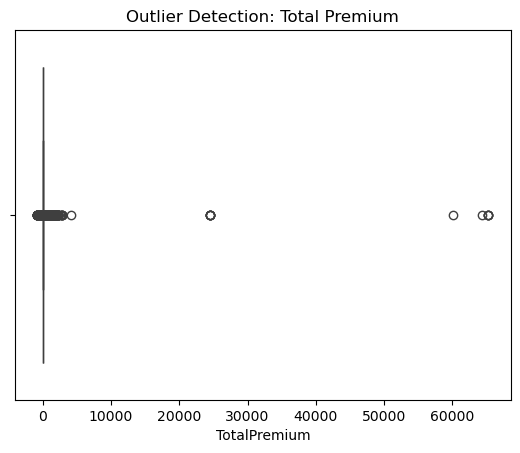

In [97]:
#Outlier Detection:
# Boxplot for TotalPremium
sns.boxplot(x=df['TotalPremium'])
plt.title('Outlier Detection: Total Premium')
plt.show()

In [98]:
print(df['TotalPremium'].describe())
print(df['TotalClaims'].describe())


count    1.000098e+06
mean     6.190550e+01
std      2.302845e+02
min     -7.825768e+02
25%      0.000000e+00
50%      2.178333e+00
75%      2.192982e+01
max      6.528260e+04
Name: TotalPremium, dtype: float64
count    1.000098e+06
mean     6.486119e+01
std      2.384075e+03
min     -1.200241e+04
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      3.930921e+05
Name: TotalClaims, dtype: float64


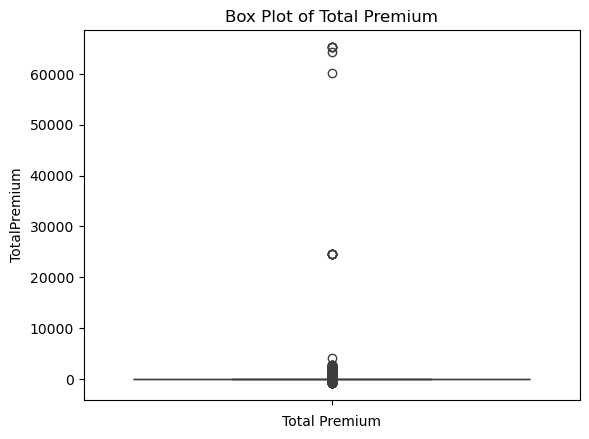

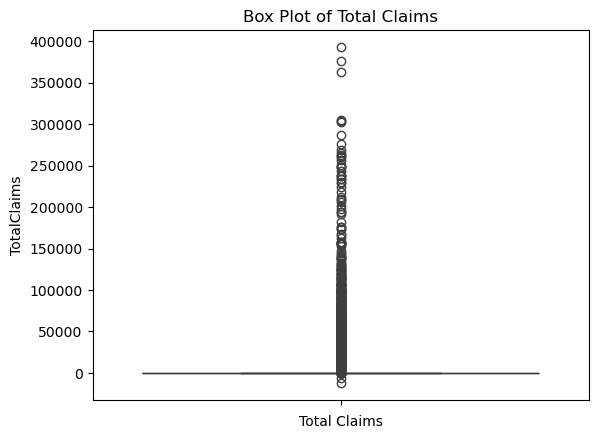

In [100]:
# Box plot for 'TotalPremium'
sns.boxplot(data=df['TotalPremium'])
plt.title('Box Plot of Total Premium')
plt.xlabel('Total Premium')
plt.show()

# Box plot for 'TotalClaims'
sns.boxplot(data=df['TotalClaims'])
plt.title('Box Plot of Total Claims')
plt.xlabel('Total Claims')
plt.show()